In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j

custom jupyter library imported


In [40]:
def plot(x, y, xr, yr, files, colour):
    for f in files:
        zu_mg = j.merge(j.mk(f))
        if zu_mg:
            plt.plot(np.array(zu_mg[x])/xr, np.array(zu_mg[y])/yr, colour)
    
def compare(text, ylabel, xlabel, ky, kx, ry, rx, descr='all_nw', overlay='all'):
    nplots = 2 if 'all' in descr else 1
    fx = 14 if nplots > 1 else 7
    fy = 4
    sx = 1
    sy = 2 if nplots > 1 else 1
    j.debug = False
    plt.figure(figsize=(fx, fy))
    plt.suptitle(text)    
    
    if descr in ['zte', 'all_nw']:
        plt.subplot(sx, sy, 1)
        plt.xlabel('MTN ZTE ' + xlabel)
        plt.ylabel(ylabel)
        if overlay in ['ublox', 'all']:
            j.dirr = 'logs/zte_mtn/rf_shield/ublox/'
            plot(kx, ky, rx, ry, files, 'g*')
        if overlay in ['quectel', 'all']:
            j.dirr = 'logs/zte_mtn/rf_shield/quectel/'
            plot(kx, ky, rx, ry, files, 'k*')
    if descr in ['nokia', 'all_nw'] and nplots > 1:
        plt.subplot(sx, sy, 2)
        plt.xlabel('Vodacom Nokia ' + xlabel)
        if overlay in ['ublox', 'all']:
            j.dirr = 'logs/nokia_vodacom/centurycity/ublox/'
            plot(kx, ky, rx, ry, files, 'b*')
        if overlay in ['quectel', 'all']:
            j.dirr = 'logs/nokia_vodacom/centurycity/quectel/'
            plot(kx, ky, rx, ry, files, 'r*')
    if descr in ['ublox', 'all_ue']:
        plt.subplot(sx, sy, 1)
        plt.xlabel('Ublox ' + xlabel)
        plt.ylabel(ylabel)
        if overlay in ['zte', 'all']:
            j.dirr = 'logs/zte_mtn/rf_shield/ublox/'
            plot(kx, ky, rx, ry, files, 'g*')
        if overlay in ['nokia', 'all']:
            j.dirr = 'logs/nokia_vodacom/centurycity/ublox/'
            plot(kx, ky, rx, ry, files, 'b*')
    if descr in ['quectel', 'all_ue']:
        plt.subplot(sx, sy, 2)
        plt.xlabel('Quectel ' + xlabel)
        if overlay in ['zte', 'all']:
            j.dirr = 'logs/zte_mtn/rf_shield/quectel/'
            plot(kx, ky, rx, ry, files, 'k*')
        if overlay in ['nokia', 'all']:
            j.dirr = 'logs/nokia_vodacom/centurycity/quectel/'
            plot(kx, ky, rx, ry, files, 'r*')
        
    plt.savefig('img/vodacom_vs_mtn_' + descr + "_".join(text.split()) + '.png')
    plt.show()
    
# def compare(text, ylabel, xlabel, ky, kx, ry, rx):
#     # compare_ue(text, ylabel, xlabel, ky, kx, ry, rx)
#     compare_nw(text, ylabel, xlabel, ky, kx, ry, rx)
    
files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*', 'echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*', 'cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*', 'drx/cap/*', 'ptau/capture/*']


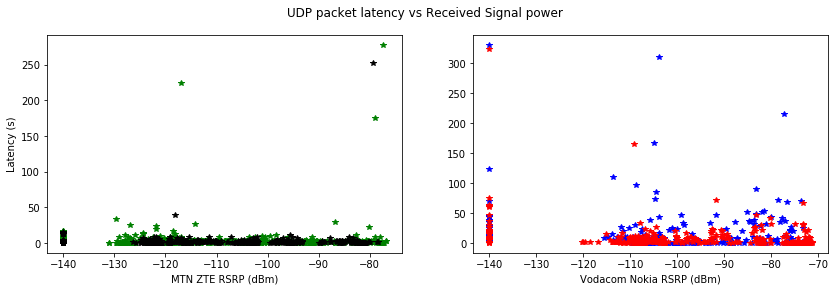

In [41]:
compare('UDP packet latency vs Received Signal power', 'Latency (s)', 'RSRP (dBm)', 'txTime', 'Signal power', 1000, 10)

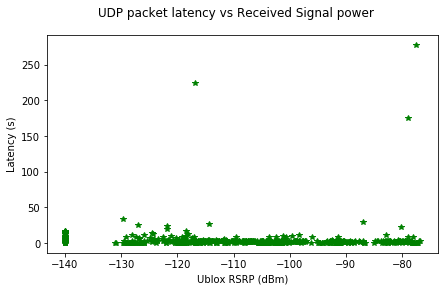

In [43]:
compare('UDP packet latency vs Received Signal power', 'Latency (s)', 'RSRP (dBm)', 'txTime', 'Signal power', 1000, 10, 'ublox', 'zte')